# Apprenticeships
This notebook replicates the code to process the code originally developed as Python code, with unit tests.

In [1]:
# import packages
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import URLhandler
import yaml
import urllib.request

Read the url of the Excel data to process, from a YAML config file

In [2]:
with open("data_url.yml") as fstream:
    config = yaml.safe_load(fstream)

Get the Excel data stored at the given url

In [3]:
url = config['url']
urlhndlr = URLhandler.URLhandler(url)
if urlhndlr.check_url():
    # open url, if valid
    socket = urllib.request.urlopen(url)
    # get XLSX data
    xlsx_data = pd.ExcelFile(socket)

Extract the data into a pandas data frame from worksheet '1A'

In [5]:
raw_data = xlsx_data.parse('1A', header=0, skiprows=4, index_col=0, na_values='*', parse_cols=5)
raw_data.head()

,2012/13,2013/14,2014/15,2015/16,2016/17
Total matched apprenticeship starts,450710.0,388590.0,445910.0,457020.0,449830.0
NaN,NaN,NaN,NaN,NaN,NaN
Sector,NaN,NaN,NaN,NaN,NaN
A - Agriculture,2150.0,1950.0,2070.0,2510.0,2190.0
B - Mining,210.0,110.0,110.0,170.0,180.0


Extract subsets

In [13]:
totals = raw_data.iloc[0, :].values
df = raw_data.iloc[3:25, :]

Plot histograms for the data

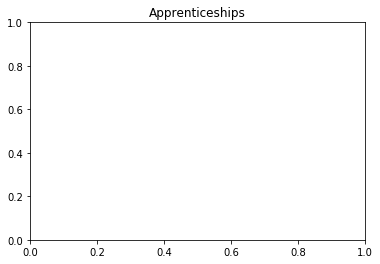

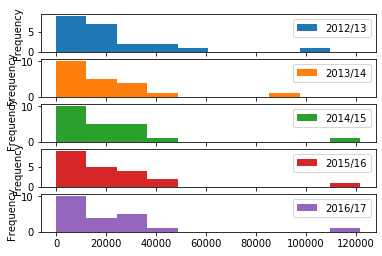

In [18]:
plt.title("Apprenticeships")
df.plot(kind='hist', subplots=True)
plt.show()